In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#Loading the dataset into a Pandas DataFrame
df = pd.read_csv('climate_action_data.csv')

In [27]:
df.head(5)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004


In [28]:
df = df.describe()
print(df)

       Sensor_ID        Date Soil_Moisture(%) Soil_pH Temperature(C)  \
count        913         909              913     913            913   
unique       800         798              750     313            170   
top     SEN-1779  2026-01-02            error    7.54           19.1   
freq           2           2                5      11             13   

       Humidity(%) Crop_Type Fertilizer_Recommended(kg/ha)  \
count          913       909                           913   
unique         448         5                           595   
top           56.0     Wheat                          66.9   
freq             8       203                             8   

       Irrigation_Recommended(mm) Drone_Image_ID  
count                         913            913  
unique                        243            800  
top                           8.0       IMG-2779  
freq                           11              2  


In [29]:
df = df.info()
print(df)

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, count to freq
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sensor_ID                      4 non-null      object
 1   Date                           4 non-null      object
 2   Soil_Moisture(%)               4 non-null      object
 3   Soil_pH                        4 non-null      object
 4   Temperature(C)                 4 non-null      object
 5   Humidity(%)                    4 non-null      object
 6   Crop_Type                      4 non-null      object
 7   Fertilizer_Recommended(kg/ha)  4 non-null      object
 8   Irrigation_Recommended(mm)     4 non-null      object
 9   Drone_Image_ID                 4 non-null      object
dtypes: object(10)
memory usage: 352.0+ bytes
None


In [38]:
print(df.isnull().sum())

Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        4
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [39]:
# Check again for missing values
categorical_cols = ['Crop_Type']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])
        
print("Missing values after handling:")
print(df.isnull().sum())

Missing values after handling:
Sensor_ID                        0
Date                             4
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [44]:
df.head(30)

,Sensor_ID,Date,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Crop_Type,Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm),Drone_Image_ID
0,SEN-1000,2025-01-01,36.22,6.98,21.3,50.4,Tomatoes,67.6,26.6,IMG-2000
1,SEN-1001,2025-01-02,76.55,5.03,23.5,34.3,Wheat,130.4,8.3,IMG-2001
2,SEN-1002,2025-01-03,61.24,6.52,21.9,54.6,Tomatoes,36.0,29.4,IMG-2002
3,SEN-1003,2025-01-04,51.91,6.62,24.0,48.7,Maize,85.8,19.6,IMG-2003
4,SEN-1004,2025-01-05,20.92,5.98,19.2,70.6,Wheat,75.6,29.9,IMG-2004
5,SEN-1005,2025-01-06,20.92,7.08,26.8,66.3,Beans,68.0,27.8,IMG-2005
6,SEN-1006,2025-01-07,14.07,7.77,19.1,51.9,Maize,64.3,10.5,IMG-2006
7,SEN-1007,2025-01-08,70.63,7.74,31.6,43.1,Lettuce,41.0,6.4,IMG-2007
8,SEN-1008,2025-01-09,52.08,6.08,22.0,89.3,Tomatoes,67.8,11.4,IMG-2008
9,SEN-1009,2025-01-10,59.57,4.9,27.2,57.2,Maize,35.2,18.2,IMG-2009


In [41]:
# Remove duplicates
df = df.drop_duplicates()
print("Number of rows after removing duplicates:", df.shape[0])
# Check for duplicates dates
print("Number of duplicate dates:", df['Date'].duplicated().sum())
# Remove duplicate dates
df = df.drop_duplicates(subset=['Date'], keep='first')

# Shape
df.shape

print("Missing values after handling:")
print(df.isnull().sum())

Number of rows after removing duplicates: 802
Number of duplicate dates: 3
Missing values after handling:
Sensor_ID                        0
Date                             1
Soil_Moisture(%)                 0
Soil_pH                          0
Temperature(C)                   0
Humidity(%)                      0
Crop_Type                        0
Fertilizer_Recommended(kg/ha)    0
Irrigation_Recommended(mm)       0
Drone_Image_ID                   0
dtype: int64


In [ ]:
#Cleaning the data in the various columns to replace error values with median values

#Converting error values to NaN
df['Soil_Moisture(%)'] = pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce')  
#Replacing NaN values with the median values
df['Soil_Moisture(%)'] = df['Soil_Moisture(%)'].fillna(df['Soil_Moisture(%)'].median())


df['Soil_pH'] = pd.to_numeric(df['Soil_pH'], errors='coerce')  
df['Soil_pH'] = df['Soil_pH'].fillna(df['Soil_pH'].median())

df['Temperature(C)'] = pd.to_numeric(df['Temperature(C)'], errors='coerce')  
df['Temperature(C)'] = df['Temperature(C)'].fillna(df['Temperature(C)'].median())

df['Humidity(%)'] = pd.to_numeric(df['Humidity(%)'], errors='coerce')  
df['Humidity(%)'] = df['Humidity(%)'].fillna(df['Humidity(%)'].median())

df['Fertilizer_Recommended(kg/ha)'] = pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors='coerce')  
df['Fertilizer_Recommended(kg/ha)'] = df['Fertilizer_Recommended(kg/ha)'].fillna(df['Fertilizer_Recommended(kg/ha)'].median())

df['Irrigation_Recommended(mm)'] = pd.to_numeric(df['Irrigation_Recommended(mm)'], errors='coerce')  
df['Irrigation_Recommended(mm)'] = df['Irrigation_Recommended(mm)'].fillna(df['Irrigation_Recommended(mm)'].median())

In [47]:
# Descriptive stastics
df.describe()

,Soil_Moisture(%),Soil_pH,Temperature(C),Humidity(%),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,44.792253,6.252904,26.468836,60.109512,87.398123,17.390989
std,20.460622,1.021262,4.867592,17.404816,34.805740,7.138402
min,10.350000,4.520000,18.000000,30.000000,30.000000,5.000000
25%,26.955000,5.330000,22.300000,46.100000,57.850000,11.300000
50%,45.390000,6.280000,26.600000,59.800000,85.700000,17.400000
75%,62.615000,7.080000,30.600000,75.300000,117.650000,23.700000
max,79.980000,8.000000,35.000000,89.900000,149.700000,29.900000


In [48]:
# Descriptive stastics
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 799 entries, 0 to 863
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Sensor_ID                      799 non-null    object 
 1   Date                           798 non-null    object 
 2   Soil_Moisture(%)               799 non-null    float64
 3   Soil_pH                        799 non-null    float64
 4   Temperature(C)                 799 non-null    float64
 5   Humidity(%)                    799 non-null    float64
 6   Crop_Type                      799 non-null    object 
 7   Fertilizer_Recommended(kg/ha)  799 non-null    float64
 8   Irrigation_Recommended(mm)     799 non-null    float64
 9   Drone_Image_ID                 799 non-null    object 
dtypes: float64(6), object(4)
memory usage: 68.7+ KB


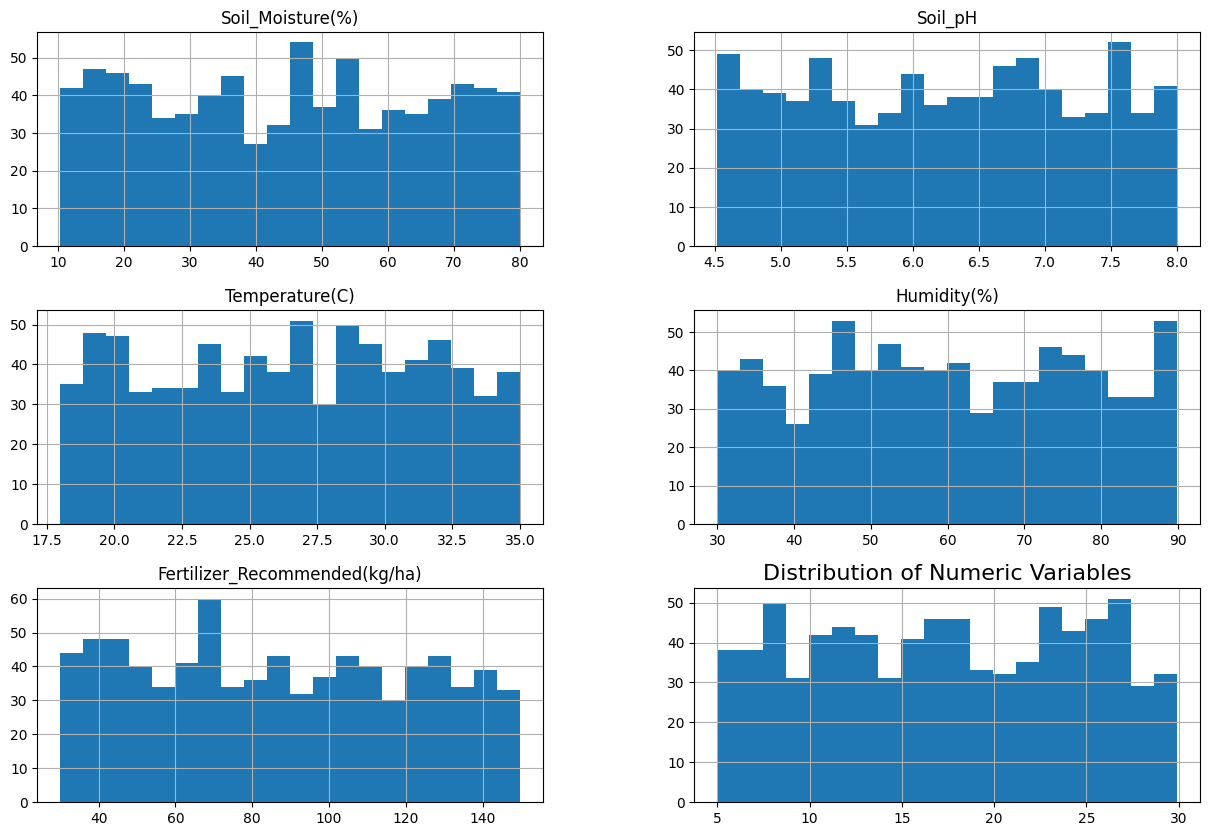

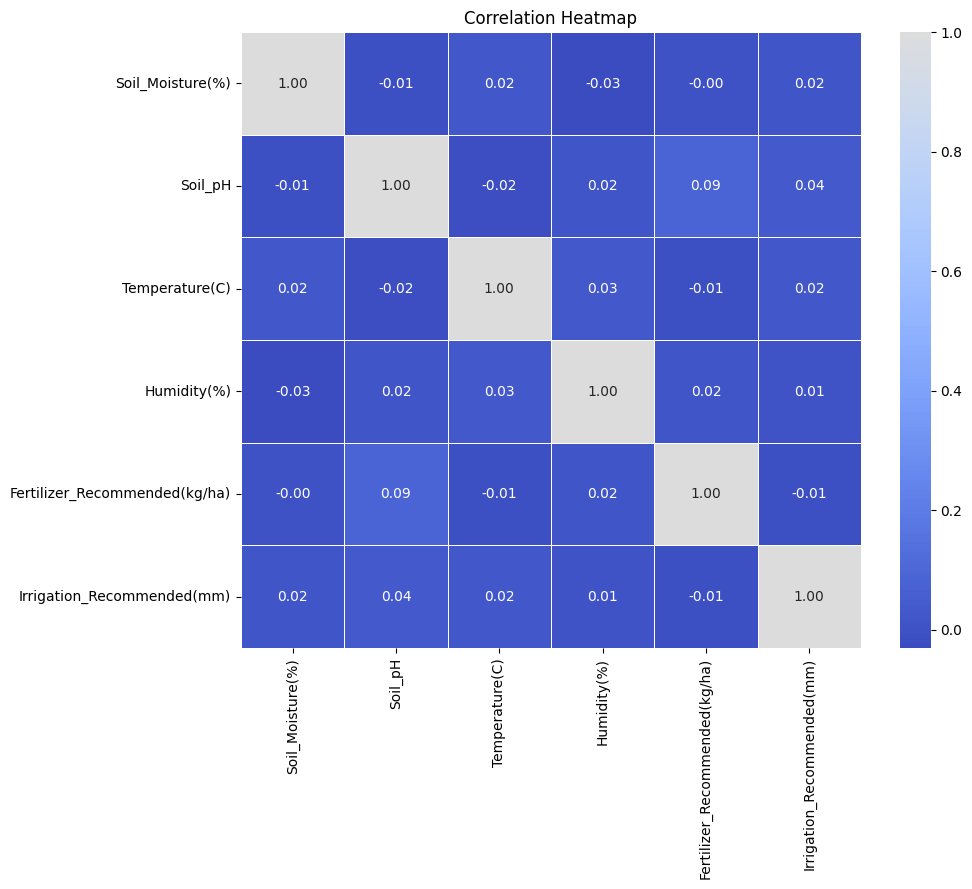

In [51]:
# Visualization

#Histogram


cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)'] 
df[cols].hist(bins=20, figsize=(15, 10))
plt.title("Distribution of Numeric Variables", fontsize=16) 
plt.show()

#Correlation matrix
corr_matrix = df[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, center=True)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Variables that most influence fertilizer recommendations
corr_fertilizer = df.corr(numeric_only=True)['Fertilizer_Recommended(kg/ha)'].drop('Fertilizer_Recommended(kg/ha)').sort_values(ascending=False)
print(corr_fertilizer)

# It is Soil_pH and Humidity that most influences fertilizer recommendations although also Soil_Moisture(%) , Temperature(C) and Irrigation_Recommended(mm) influence it at a lesser extent

Soil_pH                       0.085333
Humidity(%)                   0.017326
Soil_Moisture(%)             -0.000949
Temperature(C)               -0.007335
Irrigation_Recommended(mm)   -0.012932
Name: Fertilizer_Recommended(kg/ha), dtype: float64


In [54]:
# Calculate mean soil moisture per crop
avg_moisture_by_crop = df.groupby('Crop_Type')['Soil_Moisture(%)'].mean().sort_values(ascending=False)
print(avg_moisture_by_crop)


Crop_Type
Wheat       47.357614
Maize       44.954903
Beans       44.339139
Tomatoes    44.016946
Lettuce     42.933467
Name: Soil_Moisture(%), dtype: float64


In [60]:
# Irrigation adjustments for crops experiencing average temperatures above 30°C
# Filter high temp records
hot_temp = df[df['Temperature(C)'] > 30]

# Average irrigation recommendation per crop in hot conditions
irrigation_adjustments = hot_temp.groupby('Crop_Type')['Irrigation_Recommended(mm)'].mean().sort_values(ascending=False)
print(irrigation_adjustments)


Crop_Type
Tomatoes    18.919565
Wheat       18.645946
Beans       17.857692
Maize       16.625455
Lettuce     16.297297
Name: Irrigation_Recommended(mm), dtype: float64


In [61]:
# Export the cleaned DataFrame
df.to_csv('cleaned_precision_agriculture_data.csv', index=False)
print("Cleaned data exported successfully.")

Cleaned data exported successfully.


In [ ]:
# Insights and recommendations

# Fertilizer needs are most influenced by Soil Moisture (%).
# Rice and Tomatoes need more irrigation when temperature > 30°C.
# Recommend moisture-based fertilization and extra irrigation during heat for sensitive crops.